In [3]:
# Imports - may or may not need all of these
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Occupancy_Estimation.csv")
df

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0            34        53        40      0.08      0.19      0.06      0.06   
1            33        53        40      0.93      0.05      0.06      0.06   
2            34        53        40      0.43      0.11      0.08      0.06   
3            34        53        40      0.41      0.10      0.10      0.09   
4            34        54        40      0.18      0.06      0.06      0.06   
...         ...       ...       ...       ...       ...       ...       ...   
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0         390      0.769231       0       0                     1  
1         390      0.646154       0       0                     1  
2         390      0.519231       0       0                     1  
3         390      0.388462       0       0                     1  
4         390      0.253846       0       0                     1  
...       ...           ...     ...     ...                   ...  
10124     345      0.000000       0       0                     0  
10125     345      0.000000       0       0                     0  
10126     345      0.000000       0       0                     0  
10127     345      0.000000       0       0                     0  
10128     345      0.000000       0       0                     0  

[10129 rows x 19 columns]

In [4]:
df.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  Room_Occupancy_Count  
count  10129.000000          10129.000000  
mean       0.079574              0.398559  
std        0.270645              0.893633  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              0.000000  
75%        0.000000              0.000000  
max        1.000000              3.000000

<Axes: >

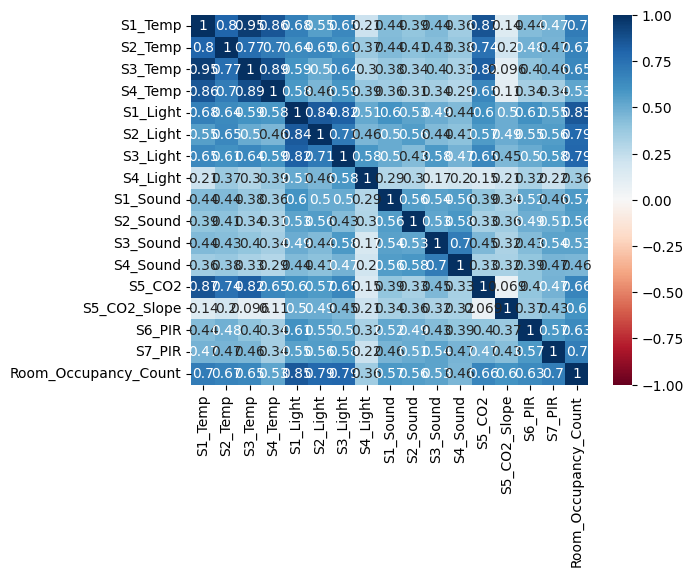

In [6]:
df_v1 = df.drop(columns=['Date', 'Time'])
corr = df_v1.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

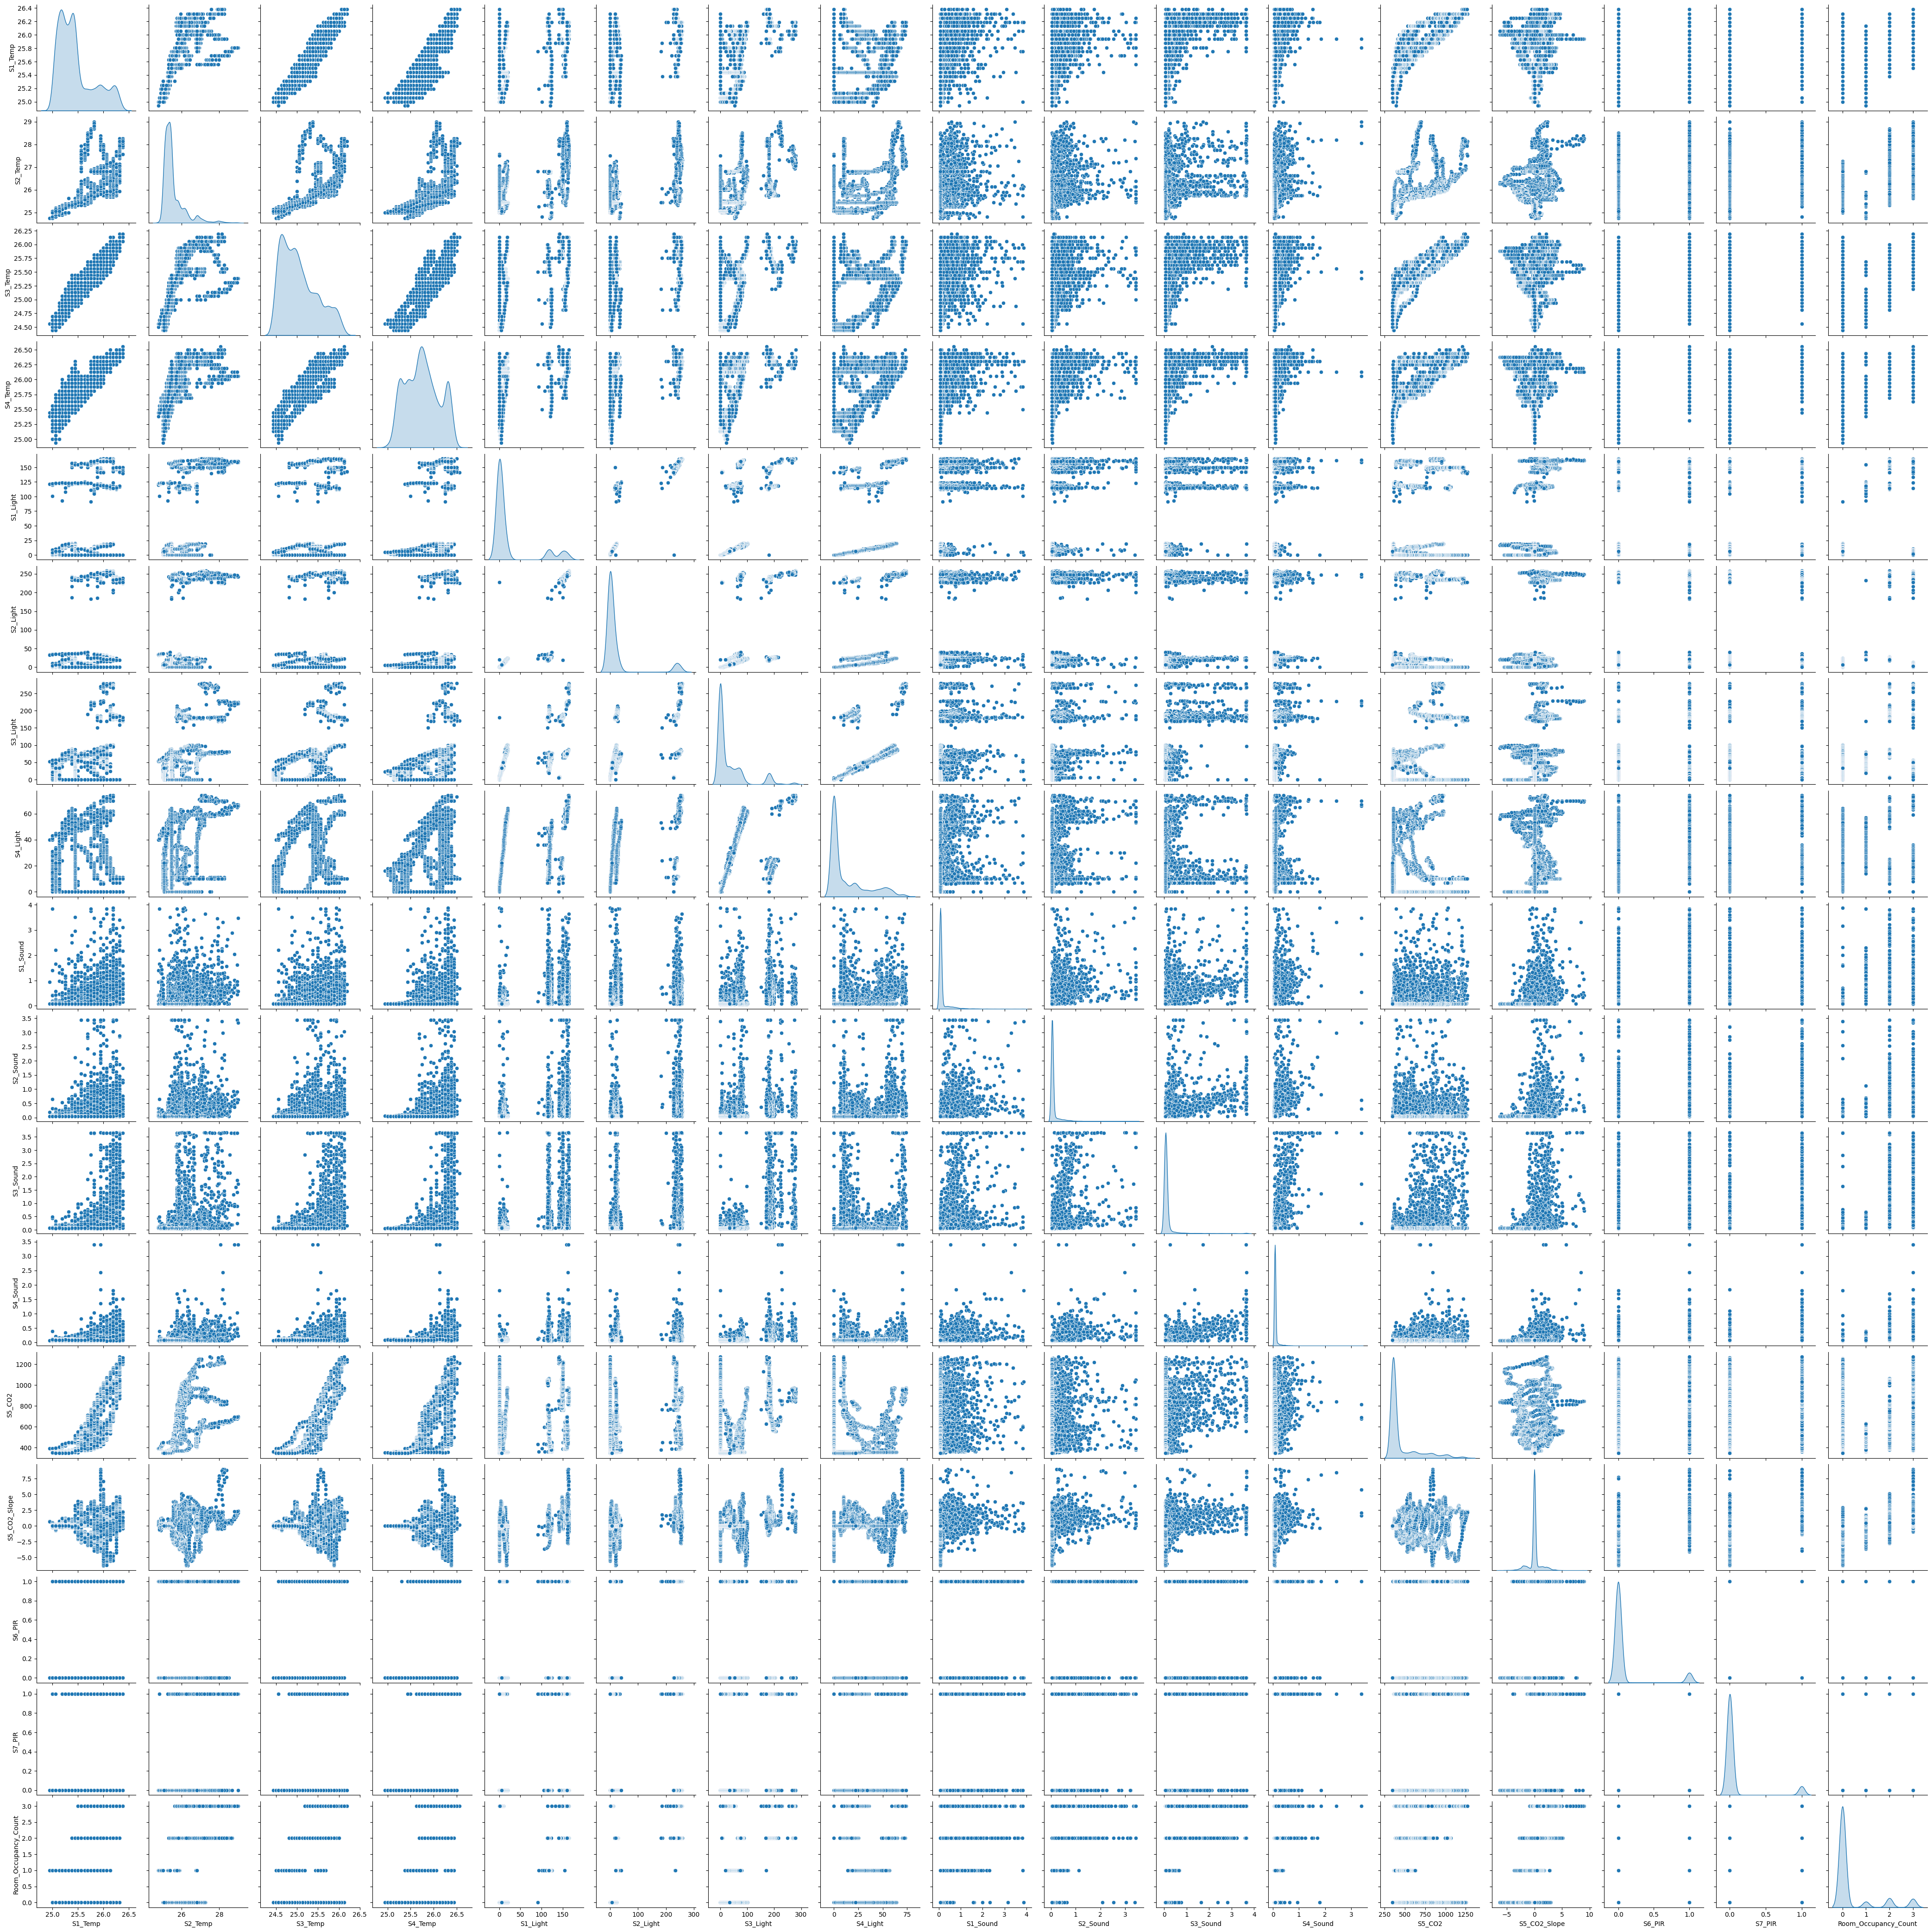

In [7]:
sns.pairplot(df, diag_kind='kde') # running this might take a while because of how many attributes we have
# we should probably think of a good way to segment the data because these scatter plots are too large to run within a reasonable time

1. Number of Observations: 10129 observations, with no missing data
2. Scaling:
3. Missing Data:
4. Column Descriptions: \\

Identification Attributes: \\
Date: YYYY/MM/DD \\
Time: HH:MM:SS \\

Sensors S1-S4: \\
Temperature: In degrees Celsius \\
Light: In Lux \\
Sound: In Volts (amplifier output read by ADC) \\

Sensor S5: \\
CO2: In PPM \\
CO2 Slope: Slope of CO2 values taken in a sliding window \\

Sensor S6: \\
PIR: Binary value conveying motion detection \\

Class Attribute: \\
Room_Occupancy_Count: Ground Truth